In [1]:
# Cellule taguée 'parameters'
test_size = 0.3
random_state = 42
model_c_value = 1.0
dataset_path = 'loan_data.csv'

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import warnings

warnings.filterwarnings('ignore')
print(f"Paramètres chargés : test_size={test_size}, C={model_c_value}, dataset='{dataset_path}'")

Paramètres chargés : test_size=0.3, C=1.0, dataset='loan_data.csv'


In [3]:
# Charger les données en utilisant le chemin du paramètre
try:
    df = pd.read_csv(dataset_path)
    print("Aperçu des données (df.head()) :")
    display(df.head()) # [cite: 184]
except FileNotFoundError:
    print(f"Erreur : Le fichier de données {dataset_path} n'a pas été trouvé.")

Aperçu des données (df.head()) :


,age,revenu_annuel,pret_demande,statut_pret
0,25,50000,10000,1
1,30,80000,25000,1
2,35,45000,5000,0
3,40,120000,50000,1
4,45,65000,20000,0


In [4]:
print("Statistiques descriptives (df.describe()) :")
display(df.describe()) # [cite: 185]

Statistiques descriptives (df.describe()) :


,age,revenu_annuel,pret_demande,statut_pret
count,10.000000,10.000000,10.000000,10.000000
mean,38.800000,71000.000000,20500.000000,0.600000
std,10.315038,25582.111806,12825.755338,0.516398
min,25.000000,30000.000000,5000.000000,0.000000
25%,30.500000,53750.000000,11250.000000,0.000000
50%,37.500000,72500.000000,19000.000000,1.000000
75%,47.250000,83750.000000,24250.000000,1.000000
max,55.000000,120000.000000,50000.000000,1.000000


In [5]:
# Préparation simple des données
X = df.drop('statut_pret', axis=1)
y = df['statut_pret']

# Division des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

# Mise à l'échelle
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# Entraîner le modèle en utilisant le paramètre C
model = LogisticRegression(C=model_c_value, random_state=random_state)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"Entraînement du modèle terminé. Précision : {acc:.4f}")

Entraînement du modèle terminé. Précision : 0.6667


Distribution de l'âge dans le jeu de données :


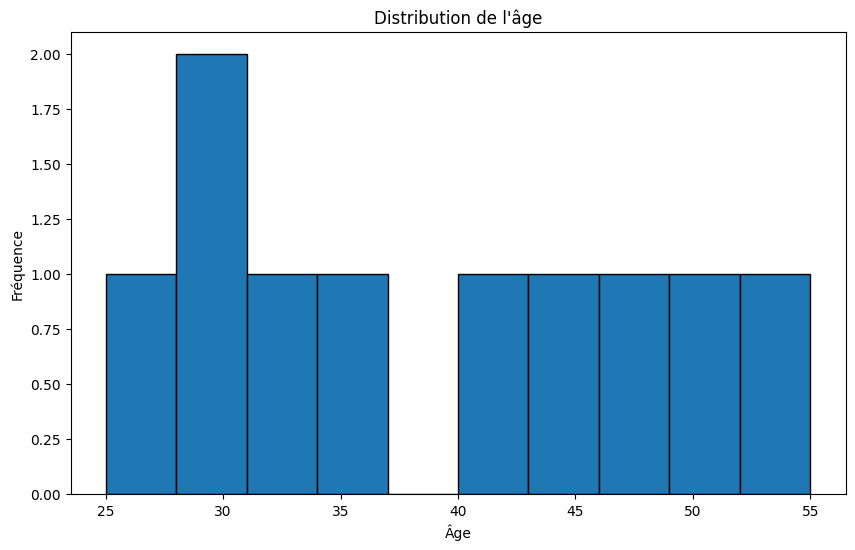

In [7]:
# Histogramme de distribution d'âge
print("Distribution de l'âge dans le jeu de données :")
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=10, edgecolor='black')
plt.title('Distribution de l\'âge')
plt.xlabel('Âge')
plt.ylabel('Fréquence')
plt.show()

In [8]:
# Matrice de confusion interactive
print("Matrice de confusion (Plotly) :")
cm = confusion_matrix(y_test, y_pred)
z = cm.tolist()
x = ['Prédit 0', 'Prédit 1']
y = ['Actuel 0', 'Actuel 1']

fig = ff.create_annotated_heatmap(z, x=x, y=y, colorscale='Viridis')
fig.update_layout(title_text='Matrice de Confusion')
fig.show()

Matrice de confusion (Plotly) :
